## 1. Importing Libraries and Reading the Dataset

In [ ]:
# !pip install numpy pandas matplotlib seaborn sklearn 

In [1]:
import numpy as np   # numerical  computing
import pandas as pd   #  for  data  analysis
import matplotlib.pyplot as plt   # for  visalisation
import seaborn as sns            #  for  visualisation
import sklearn as sk    #  for  machine learning
from sklearn.linear_model import LinearRegression    # for  machine learning for simple & multiple linear
from sklearn.model_selection import train_test_split  #  for  spliting the data
from sklearn.tree import DecisionTreeRegressor    # regression algorithm
from sklearn.metrics import mean_squared_error    #  evaluation of  performance of the algorithm
from sklearn.model_selection import cross_val_score  # crosss validation
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')


%matplotlib inline  #  allow visualisation within the cell of the notebook

C:\Users\bunmi\AppData\Local\Temp\ipykernel_4716\2562957231.py:12: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML
UsageError: unrecognized arguments: # allow visualisation within the cell of the notebook


In [2]:
# Load the dataset into a pandas DataFrame
dataset = pd.read_csv('ToyotaCorolla.csv')

In [3]:
dataset.shape

(1436, 10)

In [4]:
dataset.sample(4)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
81,17250,29,20000,Petrol,110,1,0,1600,5,1115
280,12950,35,46304,Petrol,97,1,0,1400,5,1060
1333,10000,75,64000,Petrol,107,0,1,1600,3,1085
1209,7250,78,87000,Petrol,110,1,0,1600,4,1035


In [5]:
dataset.sample(frac=0.01)   # random checking of the dataset

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
521,11950,51,50000,Petrol,86,1,0,1300,5,1045
242,11950,43,58277,Petrol,110,1,0,1600,3,1045
128,17950,17,33740,Petrol,97,1,0,1400,5,1135
1205,6750,75,87613,Petrol,86,0,0,1300,3,1015
925,8950,59,56259,Petrol,86,0,0,1300,3,1015
801,9995,61,73894,Petrol,110,1,0,1600,3,1065
1118,8950,73,112963,Diesel,72,1,0,2000,5,1135
460,9500,55,69813,Petrol,97,1,0,1400,3,1025
190,11950,40,161000,Diesel,69,1,0,1900,3,1105
839,10500,65,67003,Petrol,110,1,0,1600,4,1035


In [6]:
dataset.head(3)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165


In [7]:
dataset.tail()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
1431,7500,69,20544,Petrol,86,1,0,1300,3,1025
1432,10845,72,19000,Petrol,86,0,0,1300,3,1015
1433,8500,71,17016,Petrol,86,0,0,1300,3,1015
1434,7250,70,16916,Petrol,86,1,0,1300,3,1015
1435,6950,76,1,Petrol,110,0,0,1600,5,1114


In [8]:
dataset.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')

In [9]:
# rearrange the  columns

dataset= dataset[[ 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight', 'Price']]

In [10]:
dataset.head()

,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Price
0,23,46986,Diesel,90,1,0,2000,3,1165,13500
1,23,72937,Diesel,90,1,0,2000,3,1165,13750
2,24,41711,Diesel,90,1,0,2000,3,1165,13950
3,26,48000,Diesel,90,0,0,2000,3,1165,14950
4,30,38500,Diesel,90,0,0,2000,3,1170,13750


## 2. Exploratory  data Analysis
EDA is where we get the basic understanding of the data in hand which then helps us in the further process of Data Cleaning & Data Preparation.

In [11]:
print(dataset.count())  # Count the Number of Non-Missing Values for each Variable
print(dataset.shape)    # to give the number of rows and  columns
dataset.describe()      #gives the summary of all the numerical variables present in our data frame

Age          1436
KM           1436
FuelType     1436
HP           1436
MetColor     1436
Automatic    1436
CC           1436
Doors        1436
Weight       1436
Price        1436
dtype: int64
(1436, 10)


,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,Price
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000
mean,55.947075,68533.259749,101.502089,0.674791,0.055710,1566.827994,4.033426,1072.45961,10730.824513
std,18.599988,37506.448872,14.981080,0.468616,0.229441,187.182436,0.952677,52.64112,3626.964585
min,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.00000,4350.000000
25%,44.000000,43000.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.00000,8450.000000
50%,61.000000,63389.500000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.00000,9900.000000
75%,70.000000,87020.750000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.00000,11950.000000
max,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.00000,32500.000000


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Age        1436 non-null   int64 
 1   KM         1436 non-null   int64 
 2   FuelType   1436 non-null   object
 3   HP         1436 non-null   int64 
 4   MetColor   1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   CC         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Weight     1436 non-null   int64 
 9   Price      1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [15]:
dataset.dtypes

Age           int64
KM            int64
FuelType     object
HP            int64
MetColor      int64
Automatic     int64
CC            int64
Doors         int64
Weight        int64
Price         int64
dtype: object

In [11]:
dataset.duplicated().sum()   #  check if there is duplicate in the dataset


1

In [12]:
duplicate_rows=dataset[dataset.duplicated()]
duplicate_rows

,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Price
113,8,13253,Diesel,116,1,0,2000,5,1320,24950


In [13]:
dataset.drop_duplicates(inplace=True)

In [14]:
dataset.duplicated().sum()

0

In [15]:
dataset.shape

(1435, 10)

In [16]:
dataset.groupby("FuelType").count()

,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,Price
FuelType,,,,,,,,,
CNG,17,17,17,17,17,17,17,17,17
Diesel,154,154,154,154,154,154,154,154,154
Petrol,1264,1264,1264,1264,1264,1264,1264,1264,1264


## 3. Data Preprocessing and Visualization
Ensure that the dataset is properly preprocessed, with missing values handled, datatype corrected and categorical variables encoded if necessary.

In [17]:
dataset.isna().sum()   #Detecting the Missing Values

Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
Price        0
dtype: int64

In [18]:
dataset.corr()

C:\Users\bunmi\AppData\Local\Temp\ipykernel_4716\2191645083.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,Price
Age,1.000000,0.504575,-0.155293,-0.107169,0.031354,-0.129564,-0.146929,-0.466484,-0.876273
KM,0.504575,1.000000,-0.332904,-0.079864,-0.082168,0.305331,-0.035193,-0.023969,-0.569420
HP,-0.155293,-0.332904,1.000000,0.058272,0.013313,0.049430,0.091803,0.087143,0.314134
MetColor,-0.107169,-0.079864,0.058272,1.000000,-0.019222,0.033870,0.084796,0.056097,0.107604
Automatic,0.031354,-0.082168,0.013313,-0.019222,1.000000,-0.069060,-0.027492,0.058499,0.033928
CC,-0.129564,0.305331,0.049430,0.033870,-0.069060,1.000000,0.125410,0.650098,0.159897
Doors,-0.146929,-0.035193,0.091803,0.084796,-0.027492,0.125410,1.000000,0.301734,0.183604
Weight,-0.466484,-0.023969,0.087143,0.056097,0.058499,0.650098,0.301734,1.000000,0.575869
Price,-0.876273,-0.569420,0.314134,0.107604,0.033928,0.159897,0.183604,0.575869,1.000000


In [19]:
corra = dataset.corr()
corra

C:\Users\bunmi\AppData\Local\Temp\ipykernel_4716\1406641262.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corra = dataset.corr()


,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,Price
Age,1.000000,0.504575,-0.155293,-0.107169,0.031354,-0.129564,-0.146929,-0.466484,-0.876273
KM,0.504575,1.000000,-0.332904,-0.079864,-0.082168,0.305331,-0.035193,-0.023969,-0.569420
HP,-0.155293,-0.332904,1.000000,0.058272,0.013313,0.049430,0.091803,0.087143,0.314134
MetColor,-0.107169,-0.079864,0.058272,1.000000,-0.019222,0.033870,0.084796,0.056097,0.107604
Automatic,0.031354,-0.082168,0.013313,-0.019222,1.000000,-0.069060,-0.027492,0.058499,0.033928
CC,-0.129564,0.305331,0.049430,0.033870,-0.069060,1.000000,0.125410,0.650098,0.159897
Doors,-0.146929,-0.035193,0.091803,0.084796,-0.027492,0.125410,1.000000,0.301734,0.183604
Weight,-0.466484,-0.023969,0.087143,0.056097,0.058499,0.650098,0.301734,1.000000,0.575869
Price,-0.876273,-0.569420,0.314134,0.107604,0.033928,0.159897,0.183604,0.575869,1.000000


C:\Users\bunmi\AppData\Local\Temp\ipykernel_4716\756512712.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corra = dataset.corr()


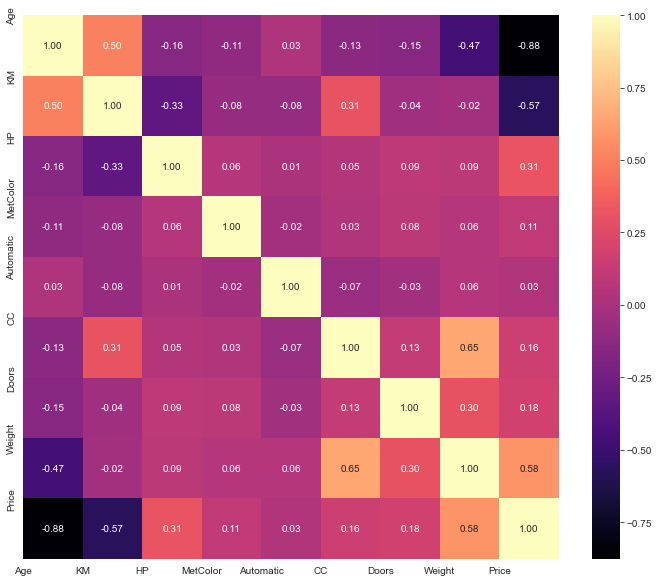

In [20]:
corra = dataset.corr()

#Plot figsize
fig, ax = plt.subplots(figsize=(12, 10))
#Generate Heat Map, allow annotations and place floats in map

sns.heatmap(corra, cmap='magma', annot=True, fmt=".2f")

#Apply xticks
plt.xticks(range(len(corra.columns)), corra.columns);
#Apply yticks
plt.yticks(range(len(corra.columns)), corra.columns)
#show plot
plt.show()

In [ ]:
-1   -0.9                    0    0.1                              +1



In [21]:
corra = dataset.corr()
corra

C:\Users\bunmi\AppData\Local\Temp\ipykernel_4716\1406641262.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corra = dataset.corr()


,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,Price
Age,1.000000,0.504575,-0.155293,-0.107169,0.031354,-0.129564,-0.146929,-0.466484,-0.876273
KM,0.504575,1.000000,-0.332904,-0.079864,-0.082168,0.305331,-0.035193,-0.023969,-0.569420
HP,-0.155293,-0.332904,1.000000,0.058272,0.013313,0.049430,0.091803,0.087143,0.314134
MetColor,-0.107169,-0.079864,0.058272,1.000000,-0.019222,0.033870,0.084796,0.056097,0.107604
Automatic,0.031354,-0.082168,0.013313,-0.019222,1.000000,-0.069060,-0.027492,0.058499,0.033928
CC,-0.129564,0.305331,0.049430,0.033870,-0.069060,1.000000,0.125410,0.650098,0.159897
Doors,-0.146929,-0.035193,0.091803,0.084796,-0.027492,0.125410,1.000000,0.301734,0.183604
Weight,-0.466484,-0.023969,0.087143,0.056097,0.058499,0.650098,0.301734,1.000000,0.575869
Price,-0.876273,-0.569420,0.314134,0.107604,0.033928,0.159897,0.183604,0.575869,1.000000


In [22]:
corra.style.background_gradient(cmap='rainbow')

,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,Price
Age,1.000000,0.504575,-0.155293,-0.107169,0.031354,-0.129564,-0.146929,-0.466484,-0.876273
KM,0.504575,1.000000,-0.332904,-0.079864,-0.082168,0.305331,-0.035193,-0.023969,-0.569420
HP,-0.155293,-0.332904,1.000000,0.058272,0.013313,0.049430,0.091803,0.087143,0.314134
MetColor,-0.107169,-0.079864,0.058272,1.000000,-0.019222,0.033870,0.084796,0.056097,0.107604
Automatic,0.031354,-0.082168,0.013313,-0.019222,1.000000,-0.069060,-0.027492,0.058499,0.033928
CC,-0.129564,0.305331,0.049430,0.033870,-0.069060,1.000000,0.125410,0.650098,0.159897
Doors,-0.146929,-0.035193,0.091803,0.084796,-0.027492,0.125410,1.000000,0.301734,0.183604
Weight,-0.466484,-0.023969,0.087143,0.056097,0.058499,0.650098,0.301734,1.000000,0.575869
Price,-0.876273,-0.569420,0.314134,0.107604,0.033928,0.159897,0.183604,0.575869,1.000000


In [24]:
dataset.columns   # checking the column names

Index(['Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors',
       'Weight', 'Price'],
      dtype='object')

In [25]:
dataset.head(3)

,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Price
0,23,46986,Diesel,90,1,0,2000,3,1165,13500
1,23,72937,Diesel,90,1,0,2000,3,1165,13750
2,24,41711,Diesel,90,1,0,2000,3,1165,13950


#### Encode  categorical variables

In [26]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
NewEnconding = LabelEncoder()
dataset['FuelType'] =NewEnconding.fit_transform(dataset['FuelType'])

In [27]:
dataset.sample(57)

,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Price
411,52,99323,2,110,1,0,1600,3,1055,10950
340,41,29716,2,116,1,0,1600,5,1075,11900
554,49,40836,2,110,0,1,1600,3,1075,11950
1122,80,111392,0,110,0,0,1598,3,1083,7460
883,65,61384,2,110,1,0,1600,3,1050,8250
612,59,154783,1,72,1,0,2000,3,1120,7750
619,65,140168,1,72,1,0,2000,3,1115,7350
230,44,63451,2,97,0,0,1400,3,1025,11925
601,50,1,1,90,1,0,2000,3,1260,7500
1336,79,63918,2,110,0,0,1600,4,1035,8500


In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Age        1435 non-null   int64
 1   KM         1435 non-null   int64
 2   FuelType   1435 non-null   int32
 3   HP         1435 non-null   int64
 4   MetColor   1435 non-null   int64
 5   Automatic  1435 non-null   int64
 6   CC         1435 non-null   int64
 7   Doors      1435 non-null   int64
 8   Weight     1435 non-null   int64
 9   Price      1435 non-null   int64
dtypes: int32(1), int64(9)
memory usage: 117.7 KB


## 4. Split the dataset into training and test sets
#### 4a.Split the data into features (X) and target variable (y)

In [30]:
# Split the data into features (X) and target variable (y)
X = dataset[['Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC','Doors', 'Weight']]  # Specify the relevant features
y = dataset['Price']  # Target variable

In [31]:
print(X.shape)   # 9 columns  and 1435 rows
print(y.shape)  # one  column  and 1435 rows

(1435, 9)
(1435,)


#### 4b. Splitting the dataset into the Training set and Test set

In [37]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75,  random_state = 142)

In [33]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (1076, 9)
Shape of X_test:  (359, 9)
Shape of y_train:  (1076,)
Shape of y_test (359,)


## 5. Regression Models
####  *Define/call the model
####  *Fit the model
#### *Predict the model
#### *Evaluate the model

### Simple Linear Model

In [34]:
X1 = dataset[["Age"]].values
y1 = dataset["Price"].values

In [48]:
# Create train test datasets

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size = 0.75,  random_state = 10)
print('Train Dataset : ', X1_train.shape, y1_train.shape)
print('Test Dataset : ', X1_test.shape, y1_test.shape)

Train Dataset :  (1076, 1) (1076,)
Test Dataset :  (359, 1) (359,)


In [49]:
simple_lreg = LinearRegression()    # Define the model/ call the algorithm function

simple_lreg.fit(X1_train, y1_train)   #  fit the train datset into model

print('Intercept : ', simple_lreg.intercept_)  #  Get the intercept
print('Slope : ', simple_lreg.coef_)           # Get the slope  or  coeffecient

Intercept :  20181.02014418653
Slope :  [-168.99846789]


y=a+bX   - Simple linear regression  <br>
y=20082.16 + (-167.86569423)X

As we can see, the slope is -169.09, which means that price of the vehicle is highly impacted by the age of the vehicle. However, it is negatively propotional to Price.

In [50]:
# Use the model to predict the test dataset.
y1_pred = simple_lreg.predict(X1_test)   # features to predict

In [51]:
y1_pred

array([ 8858.12279545, 11731.09674961,  7844.1319881 ,  7844.1319881 ,
       16970.04925425, 16801.05078636,  9196.11973124, 10379.10900648,
       15787.05997901, 10717.10594226, 11731.09674961,  8013.130456  ,
       11731.09674961,  7675.13352021, 14097.07530009,  8351.12739178,
        7168.13811654,  7844.1319881 , 10041.11207069, 10210.11053859,
        8182.12892389,  8858.12279545,  9196.11973124, 13252.08296063,
       13590.07989642,  7506.13505232, 12069.09368539, 11055.10287804,
       13759.07836431, 15111.06610744, 10210.11053859,  7844.1319881 ,
        9703.11513491,  9872.1136028 ,  9534.11666702,  8182.12892389,
        8013.130456  ,  8858.12279545,  9196.11973124, 13590.07989642,
       11055.10287804, 11562.09828172, 16463.05385057,  9196.11973124,
        9196.11973124, 10041.11207069, 15449.06304322, 11900.0952175 ,
        8520.12585967,  6661.14271286,  6999.13964865,  9534.11666702,
        6830.14118075, 12407.09062118,  7844.1319881 ,  7168.13811654,
      

In [52]:
# Calculate the eualuation metrics of the model.
from sklearn.metrics import r2_score

r2_score_slreg = r2_score(y1_pred, y1_test)  #    comparing what it predicted  to actual value
#mse = mean_squared_error(y1_test, y1_pred)

rmse_slreg = np.sqrt(mean_squared_error(y1_pred, y1_test)**2)

print('r2_ score for test dataset for simple linear reg : ', r2_score_slreg)
#print('Mean Squared Error for test dataset for simple linear reg:', mse)
print('root mean squared error for simple linear reg : ', rmse_slreg)

r2_ score for test dataset for simple linear reg :  0.6691217708025818
root mean squared error for simple linear reg :  3462220.160250435


## Multiple Regression

Let us include some more independent variables to predict the price of the vehicle

In [53]:
# Separating the independent and dependent variable.
X = dataset.drop('Price', axis = 1).values
y = dataset["Price"].values.reshape(-1,1)

print(X.shape)  # Count of rows and columns of X ( all the other features)
print(y.shape)  # Count of rows and columns of y ( Target feature)

print(X)

(1435, 9)
(1435, 1)
[[   23 46986     1 ...  2000     3  1165]
 [   23 72937     1 ...  2000     3  1165]
 [   24 41711     1 ...  2000     3  1165]
 ...
 [   71 17016     2 ...  1300     3  1015]
 [   70 16916     2 ...  1300     3  1015]
 [   76     1     2 ...  1600     5  1114]]


In [54]:
# Create train test dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 40)
print('Train Dataset : ', X_train.shape, y_train.shape)
print('Test Dataset : ', X_test.shape, y_test.shape)

Train Dataset :  (1076, 9) (1076, 1)
Test Dataset :  (359, 9) (359, 1)


In [55]:
multi_lreg = LinearRegression()    # define or call the model

multi_lreg.fit(X_train, y_train)    # fit or train the model

print('Intercept : ', multi_lreg.intercept_)
print('Slope : ', multi_lreg.coef_)

Intercept :  [-3361.14919473]
Slope :  [[-1.28392770e+02 -1.59887290e-02  2.14514668e+02  3.14855166e+01
   1.20757698e+01  2.84455062e+02 -1.10965857e+00 -4.13075476e+01
   1.92460560e+01]]


y=a+b1X1 +b2X2 +B3X3........

In [56]:
# Use the model to predict the test dataset.
y_mlreg_pred_test = multi_lreg.predict(X_test)

# Use the model to predict the train dataset.
#y_mlreg_pred_train = multi_lreg.predict(X_train)

In [57]:
y_mlreg_pred_test

array([[ 8815.08091538],
       [ 6702.08338295],
       [ 8100.26318689],
       [10253.22513463],
       [10903.27727099],
       [15977.55883905],
       [22257.6594615 ],
       [11709.22750587],
       [ 9001.78035103],
       [ 8757.87363188],
       [15439.16715739],
       [ 6908.78866858],
       [ 8869.56516181],
       [ 9045.02524785],
       [ 7951.41986802],
       [11550.09935516],
       [11797.06014736],
       [10461.30461448],
       [13604.25586427],
       [ 6390.15668889],
       [ 7184.20382458],
       [11139.38480881],
       [ 9971.43023887],
       [10756.75847055],
       [13053.30192145],
       [ 7686.05408047],
       [11041.03774268],
       [12800.65098702],
       [ 8678.62301715],
       [21684.66155086],
       [ 7071.38853925],
       [ 6713.88361058],
       [ 8501.98842771],
       [ 9385.31631421],
       [ 7311.65825758],
       [16039.70459221],
       [13431.85095703],
       [10663.57394895],
       [ 6866.66985604],
       [10685.00479561],


In [58]:
# Calculate the eualuation metrics of the model.
from sklearn.metrics import r2_score

r2_score_mlreg = r2_score(y_mlreg_pred_test, y_test)   # coeffecient of  determination
rmse_mlreg = np.sqrt(mean_squared_error(y_mlreg_pred_test, y_test)**2)

print('r2_ score for test dataset for multi linear reg : ', r2_score_mlreg)
print('root mean squared error for multi linear reg : ', rmse_mlreg)

r2_ score for test dataset for multi linear reg :  0.8771896255258
root mean squared error for multi linear reg :  1436256.1169575555


## Decision Tree Regressor

In [59]:
X_train.shape

(1076, 9)

In [60]:
y_test.shape

(359, 1)

In [61]:
from sklearn.tree import DecisionTreeRegressor
## training the model

DecisionTreeReg = DecisionTreeRegressor(random_state=12) ##  define  or call  the function

DecisionTreeReg.fit(X_train, y_train)     #  fit  or train the model

# Use the model to predict the test dataset.
y_DecisionTreeReg_pred_test = DecisionTreeReg.predict(X_test)

# Use the model to predict the train dataset.
#y_DecisionTreeReg_pred_train = DecisionTreeReg.predict(X_train)



In [62]:
y_DecisionTreeReg_pred_test

array([ 9950.,  8450.,  8850.,  8950., 10950., 16895., 24990., 10450.,
        8950.,  8700., 15950.,  5950.,  8850.,  9500.,  8500., 10250.,
       10900., 10000., 10950.,  7950.,  8450., 10500.,  9950.,  8500.,
       14750.,  6640., 10500., 11500.,  8750., 24990.,  7900.,  7500.,
        6900.,  9950.,  6950., 13950., 11690., 11900.,  7250., 11950.,
        9900., 11900., 13750.,  7900.,  6400., 24990., 10450., 10900.,
       15950., 10950.,  6500.,  9950.,  9900.,  9450.,  9950.,  9995.,
        6400., 19250., 19250., 18800.,  8900.,  8950.,  8750.,  7500.,
        6950., 10500.,  8900., 11450.,  5750.,  8750.,  7950.,  7950.,
        7500., 13875.,  9750.,  9950., 11950., 20950., 14950.,  9500.,
        8450., 11950.,  5800.,  5900., 10000.,  8250., 18950.,  7500.,
       12950.,  9950., 16350., 15950., 12400.,  9950., 17900.,  9850.,
       10500.,  8950.,  7950.,  6950., 20950.,  9950., 12495.,  8950.,
        8450.,  7400., 12950.,  7950.,  8250.,  9750.,  5950., 10500.,
      

In [64]:
# Calculate the eualuation metrics of the model.
from sklearn.metrics import r2_score

r2_score_DecisionTreeReg_test = r2_score(y_DecisionTreeReg_pred_test, y_test)
rmse_DecisionTreeReg = np.sqrt(mean_squared_error(y_DecisionTreeReg_pred_test, y_test)**2)

print('r2_ score for test dataset for multi linear reg : ', r2_score_DecisionTreeReg_test)
print('root mean squared error for multi linear reg : ', rmse_DecisionTreeReg)

r2_ score for test dataset for multi linear reg :  0.8080022447619503
root mean squared error for multi linear reg :  2357298.3342618383


# Comparison of the three models

In [65]:

Models = [('Simple Linear Regression',  r2_score_slreg, rmse_slreg),
          ('Multiple Linear Regression',  r2_score_mlreg, rmse_mlreg),
          ('Decision Tree Regression', r2_score_DecisionTreeReg_test, rmse_DecisionTreeReg)]
          

In [66]:
predict = pd.DataFrame(data = Models, columns = ['Models', 'r2_score Testing', 'RMSE'])
predict

,Models,r2_score Testing,RMSE
0,Simple Linear Regression,0.669122,3.462220e+06
1,Multiple Linear Regression,0.877190,1.436256e+06
2,Decision Tree Regression,0.808002,2.357298e+06


 ## R-Square
 
 R-squared (R2) score, also known as the coefficient of determination, is a statistical measure used in regression analysis. It provides insight into how well a regression model fits the observed data. R2 score ranges from 0 to 1:

R2 = 0: The model doesn't explain any of the variance in the data. It's a poor fit. <br>
R2 = 1: The model perfectly explains the variance in the data. It's an excellent fit.

R2 is a measure of how well the model's predictions match the actual data:

If R2 is close to 1, it means the model's predictions are very close to the actual data points.
If R2 is close to 0, it means the model's predictions are far from the actual data points.

R2 can be negative:
This happens when the model is worse than a horizontal line (a line that doesn't use any predictors). In this case, the model is making worse predictions than simply using the mean of the dependent variable.
 
 ## RMSE - Root Mean Square Error
RMSE measures the <b>average magnitude of the errors </b> or the differences between predicted values and actual observed values. A lower RMSE indicates a better fit of the model to the data.


## MAE - Mean Absolute Error
MAE stands for Mean Absolute Error and it measures the average absolute magnitude of the errors, or the absolute differences between predicted values and actual observed values.

A lower MAE indicates that the model's predictions are closer to the actual values, signifying a better model fit. Conversely, a higher MAE suggests larger absolute prediction errors.

## Option 2

In [ ]:
from sklearn.linear_model import LinearRegression


# Create a linear regression model and fit it on the training data
model_lin = LinearRegression()
model_lin.fit(X_train, y_train)

# Predict the prices using the trained model
y_pred = model_lin.predict(X_test)

# Evaluate the model's performance (e.g., using mean squared error)
mse = mean_squared_error(y_test, y_pred)

# Print the model coefficients and the mean squared error
print('Coefficients:', model_lin.coef_)
print('Mean Squared Error:', mse)
